## Dimensionality Reduction: exercise 

### Setup

This project requires Python 3.7 or above:

In [2]:
import sys

assert sys.version_info >= (3, 7)

It also requires Scikit-Learn ≥ 1.0.1:

In [3]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

### The Olivetti Faces Dataset

*The classic Olivetti faces dataset contains 400 grayscale 64 × 64–pixel images of faces. Each image is flattened to a 1D vector of size 4,096. 40 different people were photographed (10 times each), and the usual task is to train a model that can predict which person is represented in each picture. Load the dataset using the `sklearn.datasets.fetch_olivetti_faces()` function.*

In [4]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

In [5]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

In [6]:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

We show the first 100 images together with their label. 

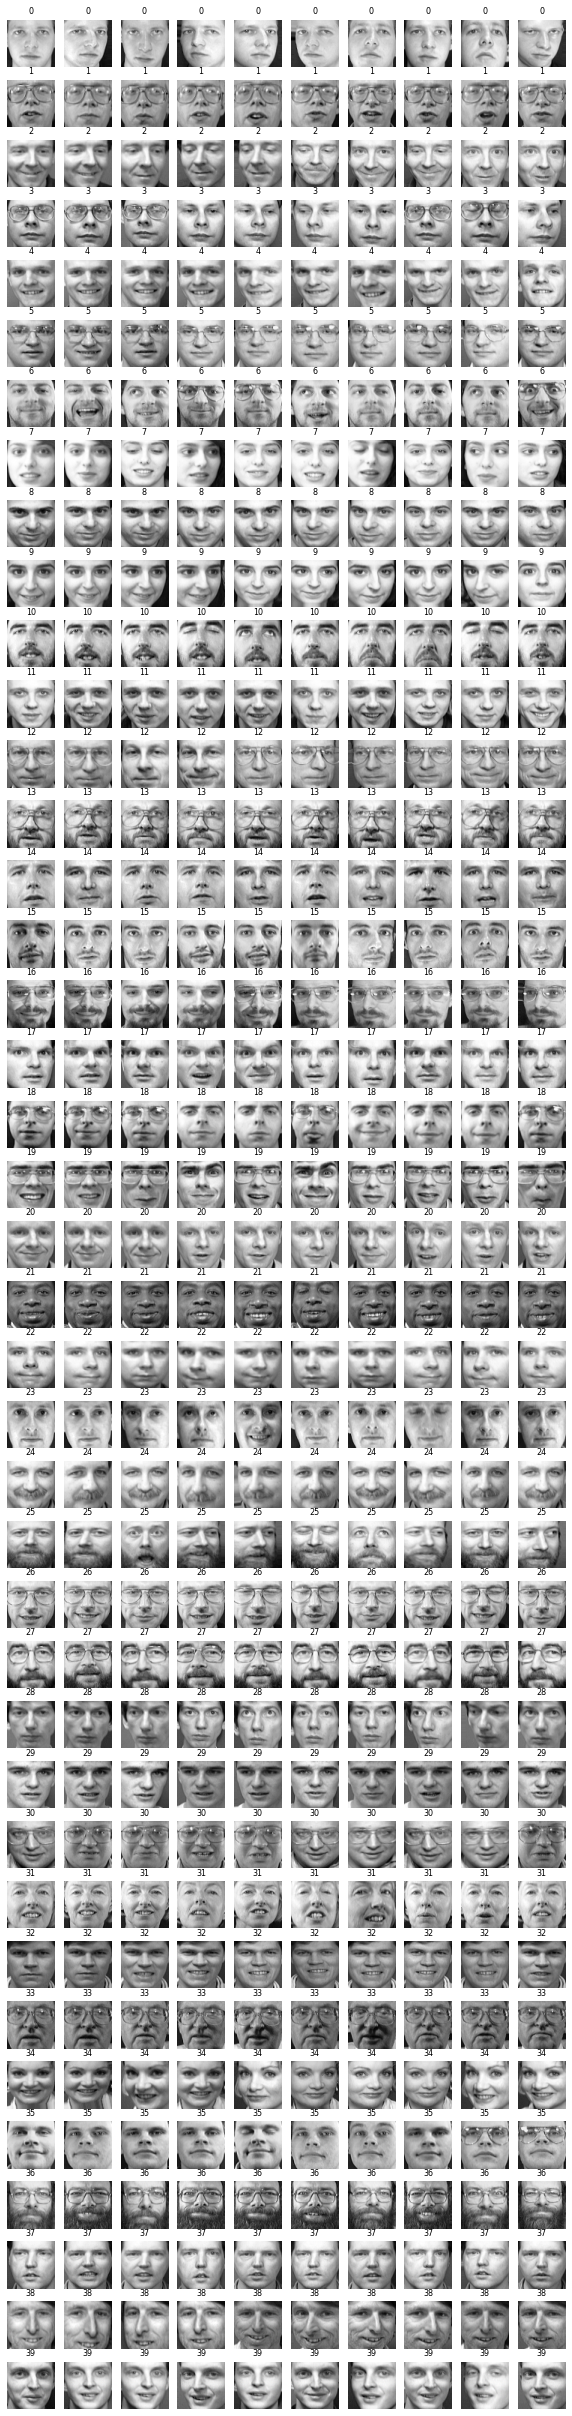

In [7]:
import matplotlib.pyplot as plt

plt.rc('font', size=8)
plt.rc('axes', labelsize=8, titlesize=8)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

def plot_faces(faces, labels, n_cols=10):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

plot_faces(olivetti.data[:400,:],olivetti.target[:400])

Split the dataset into a training set  and a test set (note that the dataset is already scaled between 0 and 1).

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(olivetti.data, olivetti.target, random_state=42)

Apply a RandomForestClassifier with 150 trees to classify the images.  
- Check the duaration of the training phase. 
- What's the accuracy on the test set? 

In [8]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=150, random_state=42)
%time clf.fit(X_train, y_train)
clf.score(X_test, y_test)


CPU times: total: 2.94 s
Wall time: 2.96 s


0.89

Now apply PCA but keep 99% variance. 
- What's the percetages of the dimensions that are left? 
- Check the duaration of the training phase. 
- What's the accuracy on the test set? 
- Is this a dataset that takes advantage from PCA? 

In [9]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(pca.n_components_)
print(X_train.shape)
print(round((pca.n_components_/X_train.shape[1])*100,1))

213
(300, 4096)
5.2


In [15]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=150, random_state=42)
%time clf.fit(X_train_pca, y_train)
clf.score(X_test_pca, y_test)

CPU times: total: 609 ms
Wall time: 603 ms


0.9

Find the best parameter combination using grid search. 
- Find the optimal number of pca components. 
- Find the optimal number of trees in the range 100 - 300 (with steps of 25)
- What's the accuracy? 

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
import numpy as np

clf = make_pipeline(PCA(random_state=42),
                    RandomForestClassifier(random_state=42))

param_grid = [{
    "pca__n_components": np.arange(100, 300, 25),
    "randomforestclassifier__n_estimators": np.arange(100, 300, 25)
}]

grid_search = GridSearchCV(clf, param_grid, cv=3,scoring='accuracy')
grid_search.fit(X_train, y_train)

c:\Users\jcor864\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
72 fits failed out of a total of 192.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jcor864\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jcor864\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\jcor864\AppData\Local\Programs\Python\Python310\lib\sit

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid=[{'pca__n_components': array([100, 125, 150, 175, 200, 225, 250, 275]),
                          'randomforestclassifier__n_estimators': array([100, 125, 150, 175, 200, 225, 250, 275])}],
             scoring='accuracy')

In [17]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'pca__n_components': 150, 'randomforestclassifier__n_estimators': 250}
0.8833333333333333


Retrain with the best parameters found. 
- Determine the training time and compare is with the original time without dimensionality reduction
- What's the possible use of this information if you spend much time finding the optimal parameter combination? 

In [18]:
pca = PCA(n_components=150)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(pca.n_components_)
print(X_train.shape)
print(round((pca.n_components_/X_train.shape[1])*100,1))

clf = RandomForestClassifier(n_estimators=250, random_state=42)
%time clf.fit(X_train_pca, y_train)
clf.score(X_test_pca, y_test)

150
(300, 4096)
3.7
CPU times: total: 1.17 s
Wall time: 1.16 s


0.93

Knowing the best parameter combination is important if you often have to retrain with new data. 

Could this technique be used for compression? 

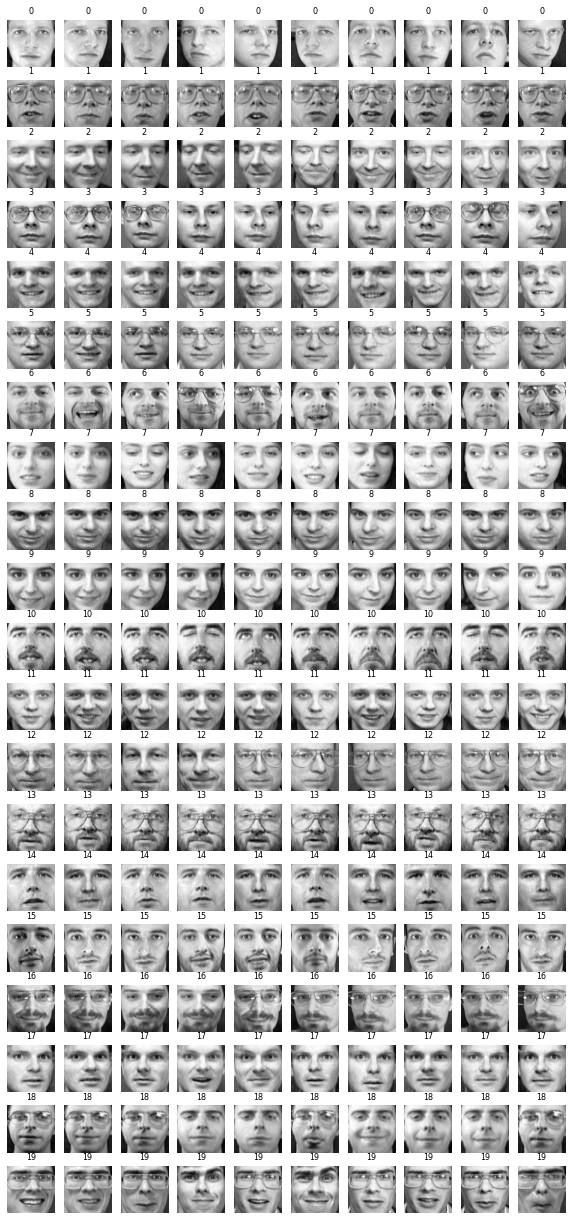

In [19]:
pca = PCA(n_components=150)
olivetti_compressed = pca.fit_transform(olivetti.data[:200,:])

olivetti_recovered = pca.inverse_transform(olivetti_compressed)

plot_faces(olivetti_recovered, olivetti.target[:200])